In [1]:
#Importing necessary packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Ensuring all data only has 2 decimal places
pd.options.display.float_format = "{:,.2f}".format

#Importing my data source. Retrieved from: https://www.kaggle.com/datasets/mruanova/us-gasoline-and-diesel-retail-prices-19952021
gas_prices = pd.read_csv(r"C:\Python\Pandas\Pandas Data Exploration 5\Data Visualization\gas_prices.csv")
print(gas_prices.head())


        Date   A1   A2   A3   R1   R2   R3   M1   M2   M3   P1   P2   P3   D1
0   1/2/1995 1.13 1.10 1.23 1.08 1.06 1.17 1.17 1.16 1.30 1.27 1.25 1.39 1.10
1   1/9/1995 1.13 1.11 1.23 1.09 1.07 1.17 1.18 1.16 1.30 1.28 1.26 1.39 1.10
2  1/16/1995 1.13 1.10 1.23 1.08 1.06 1.17 1.17 1.16 1.30 1.27 1.25 1.39 1.10
3  1/23/1995 1.13 1.11 1.23 1.08 1.07 1.17 1.18 1.17 1.30 1.28 1.26 1.38 1.09
4  1/30/1995 1.13 1.11 1.22 1.08 1.07 1.16 1.18 1.16 1.29 1.27 1.25 1.37 1.09


In [2]:
#Converting the Date data type so it can be divided by year, month and day
gas_prices['Date'] = pd.to_datetime(gas_prices['Date'], format='%m/%d/%Y')
gas_prices['Year'] = gas_prices['Date'].dt.year
gas_prices['Month'] = gas_prices['Date'].dt.month
gas_prices['Day'] = gas_prices['Date'].dt.day

In [3]:
#Using only the year data so I am dropping the date, month and day 
yearly_data = gas_prices.drop(['Date', 'Month', 'Day'], axis=1)

In [4]:
#Grouping the yearly data mean per year to make it easily read 
yearly_mean = yearly_data.groupby('Year', as_index = False).mean()

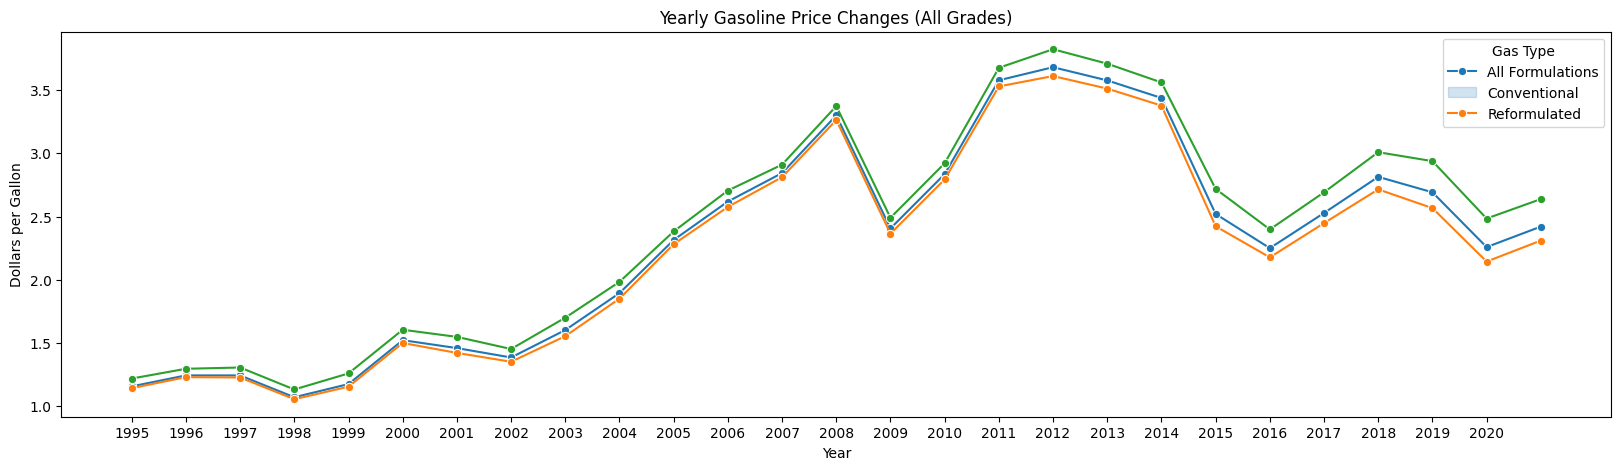

In [5]:
#Ethical Visualization
fig, ax = plt.subplots(1, figsize=(20, 5))
plt.setp(ax, xticks = range(1995,2021,1), xlabel = 'Year', ylabel = 'Dollars per Gallon')
ax.set_title('Yearly Gasoline Price Changes (All Grades)')
for n in range(1,4):
    sns.lineplot( x = 'Year', y = 'A{}'.format(n), data=yearly_mean, label = 'A{}'.format(n), marker='o')
ax.legend(title = 'Gas Type', labels = ['All Formulations', 'Conventional', 'Reformulated'])

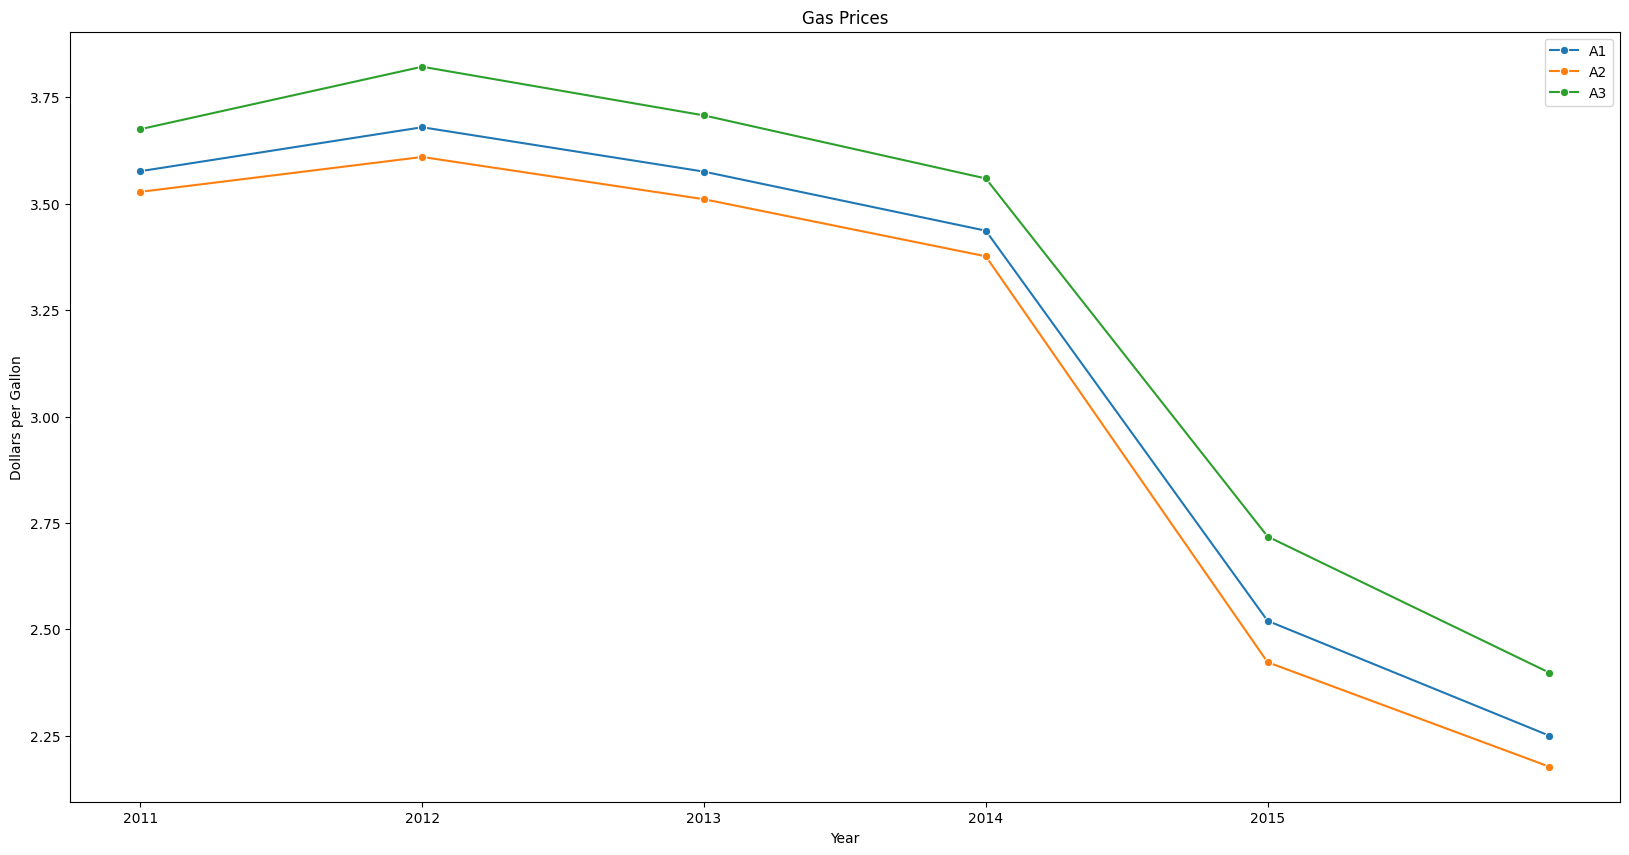

In [6]:
#Deceptive Visualization
fig, ax = plt.subplots(1, figsize=(20, 10))
plt.setp(ax, xticks = range(2011,2016,1), xlabel = 'Year', ylabel = 'Dollars per Gallon')
ax.set_title('Gas Prices')
for n in range(1,4):
    sns.lineplot( x = 'Year', y = 'A{}'.format(n), data=yearly_mean.iloc[16:22], label = 'A{}'.format(n), marker='o')